In [3]:
from mp1 import *

In [4]:
[X_train1, Y_train1] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [65]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten
from keras.utils import to_categorical

In [24]:
Y_train1 = to_categorical(Y_train1)

In [8]:
model1 = Sequential()
#model.add(Dense(64, input_shape=(5184,), activation='relu'))
model1.add(Dense(3, input_shape=(5184,), activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [62]:
model1.fit(X_train1[0:200], Y_train1[0:200], 
          validation_data=(X_train1[200:300], Y_train1[200:300]),
          epochs=20)

Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 0s 1ms/step - loss: 2.2731 - acc: 0.4650 - val_loss: 2.3989 - val_acc: 0.5400
Epoch 2/20
200/200 [==============================] - 0s 145us/step - loss: 1.6417 - acc: 0.4750 - val_loss: 0.5275 - val_acc: 0.8200
Epoch 3/20
200/200 [==============================] - 0s 236us/step - loss: 0.9559 - acc: 0.6700 - val_loss: 0.5437 - val_acc: 0.7100
Epoch 4/20
200/200 [==============================] - 0s 206us/step - loss: 0.7255 - acc: 0.6500 - val_loss: 0.7752 - val_acc: 0.7000
Epoch 5/20
200/200 [==============================] - 0s 195us/step - loss: 0.6892 - acc: 0.7000 - val_loss: 0.4591 - val_acc: 0.8100
Epoch 6/20
200/200 [==============================] - 0s 271us/step - loss: 0.6282 - acc: 0.6900 - val_loss: 0.4223 - val_acc: 0.7300
Epoch 7/20
200/200 [==============================] - 0s 211us/step - loss: 0.5349 - acc: 0.7300 - val_loss: 0.3668 - val_acc: 0.7300
Epoch 8/20
200/200

In [63]:
X_test1 = generate_a_triangle()[0]
X_test2 = generate_a_rectangle()
X_test3 = generate_a_disk()
X_test1 = X_test1.reshape(1, X_test1.shape[0])
X_test2 = X_test2.reshape(1, X_test2.shape[0])
X_test3 = X_test3.reshape(1, X_test3.shape[0])
print(model1.predict(X_test1))
print(model1.predict(X_test2))
print(model1.predict(X_test3))

[[0. 0. 1.]]
[[1. 0. 0.]]
[[0. 1. 0.]]


In [68]:
print(model1.get_weights()[0].shape)

(5184, 3)


In [72]:
weights = model1.get_weights()[0].reshape(72,72,3)

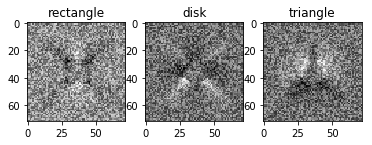

In [75]:
plt.subplot(131)
plt.imshow(weights[:,:,0], cmap='gray')
plt.title('rectangle')

plt.subplot(132)
plt.imshow(weights[:,:,1], cmap='gray')
plt.title('disk')

plt.subplot(133)
plt.imshow(weights[:,:,2], cmap='gray')
plt.title('triangle')

plt.show()

In [73]:
[X_train2, Y_train2] = generate_dataset_classification(300, 200, True)
[X_test2, Y_test2] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [52]:
Y_train2 = to_categorical(Y_train2)
X_train2 = X_train2.reshape(300,72,72,1)
X_test2 = X_test2.reshape(300,72,72,1)

In [9]:
model1.fit(X_train2[0:250], Y_train2[0:250], 
          validation_data=(X_train2[250:300], Y_train2[250:300]),
          epochs=20)

Train on 250 samples, validate on 50 samples
Epoch 1/20
250/250 [==============================] - 1s 4ms/step - loss: 2.5746 - acc: 0.3400 - val_loss: 2.1584 - val_acc: 0.3000
Epoch 2/20
250/250 [==============================] - 0s 164us/step - loss: 1.6530 - acc: 0.3200 - val_loss: 1.7455 - val_acc: 0.3000
Epoch 3/20
250/250 [==============================] - 0s 184us/step - loss: 1.2946 - acc: 0.3680 - val_loss: 1.1285 - val_acc: 0.4000
Epoch 4/20
250/250 [==============================] - 0s 173us/step - loss: 1.1112 - acc: 0.4200 - val_loss: 1.2704 - val_acc: 0.2600
Epoch 5/20
250/250 [==============================] - 0s 176us/step - loss: 1.1080 - acc: 0.4200 - val_loss: 1.0761 - val_acc: 0.2800
Epoch 6/20
250/250 [==============================] - 0s 214us/step - loss: 1.0408 - acc: 0.4320 - val_loss: 1.0881 - val_acc: 0.4600
Epoch 7/20
250/250 [==============================] - 0s 156us/step - loss: 1.0223 - acc: 0.4760 - val_loss: 1.0917 - val_acc: 0.4400
Epoch 8/20
250/250 

In [72]:
Y_test2.shape

(300, 3, 2, 2, 2)

In [70]:
model2 = Sequential()
#model.add(Dense(64, input_shape=(5184,), activation='relu'))
model2.add(Conv2D(filters=3, kernel_size=12, input_shape=(72,72,1), activation='relu'))
model2.add(Flatten())
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [71]:
model2.fit(X_train2, Y_train2, 
          validation_data=(X_test2, Y_test2),
          epochs=20)

ValueError: Error when checking target: expected dense_4 to have 2 dimensions, but got array with shape (300, 3, 2, 2)